# Autumn's exploration

Looking for periodic behaviour.

In [2]:
# Preliminary setup
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [9]:
# Import dataset from df.pickle
nrg = pd.read_pickle('alldata_clean.pickle')
wx = pd.read_pickle('allwxdata.pickle')
df = pd.merge(nrg,wx,how='outer',left_index=True,right_index=True)

In [10]:
# Interpolate weather
df.relh.interpolate(inplace=True)
df.tmpc.interpolate(inplace=True)
df.alti.interpolate(inplace=True)
df.dwpc.interpolate(inplace=True)
df.drct.fillna(method='ffill',inplace=True) # Avoids having to deal with wind crossing north (360->0)
#pd.options.display.max_rows = 2000

# Delete pre-energy rows
df = df[~df.active.isnull()]
all = df # Store for later

In [11]:
df.columns

Index(['active', 'reactive', 'volts', 'amps', 'sub1', 'sub2', 'sub3', 'relh',
       'drct', 'alti', 'tmpc', 'dwpc'],
      dtype='object')

In [14]:
ecols = ['active', 'sub1', 'sub2', 'sub3', 'house']
wxcols = ['relh','drct','alti','tmpc','dwpc']
df = df[['active']+wxcols].resample('1h').mean()

# Todo: scatter 

,active,relh,drct,alti,tmpc,dwpc
2006-12-16 17:00:00+00:00,4.222889,84.717639,330.0,30.282083,7.000000,4.597222
2006-12-16 18:00:00+00:00,3.632200,82.599250,330.0,30.307250,6.758333,4.000000
2006-12-16 19:00:00+00:00,3.400233,88.438333,330.0,30.330000,5.016667,3.258333
2006-12-16 20:00:00+00:00,3.268567,93.152917,295.0,30.352250,3.258333,2.258333
2006-12-16 21:00:00+00:00,3.056467,93.095500,275.0,30.360000,2.258333,1.258333
2006-12-16 22:00:00+00:00,2.200133,93.067917,275.0,30.367250,1.758333,0.758333
2006-12-16 23:00:00+00:00,2.061600,96.500500,255.0,30.390000,0.258333,-0.241667
2006-12-17 00:00:00+00:00,1.882467,92.970000,250.0,30.390000,0.000000,-1.000000
2006-12-17 01:00:00+00:00,3.349400,92.970000,225.0,30.390000,0.000000,-1.000000
2006-12-17 02:00:00+00:00,1.587267,92.970000,225.0,30.390000,0.000000,-1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9cc01ec940>,
      dtype=object)

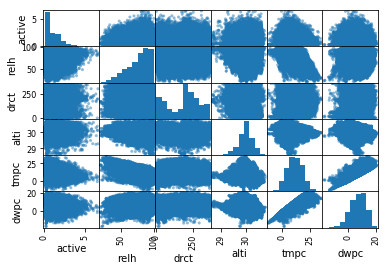

In [13]:
pd.plotting.scatter_matrix(hourly)